## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    #if flatten:
        #x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[32, 64, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Conv2D(n_units, (5, 5), activation="relu", padding='same', name="Conv2D_hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Conv2D(n_units, (5, 5), activation="relu", padding='same', name="Conv2D_hidden_layer"+str(i+1))(x)
    
    x = keras.layers.MaxPooling2D(pool_size=(2,2))(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(units=1024, activation="relu", name="hidden_layer"+str(len(num_neurons)+1))(x)
    x = keras.layers.Dropout(0.2)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0717 13:40:45.254096 16944 deprecation_wrapper.py:119] From D:\Anaconda3\envs\keras37\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0717 13:40:45.255094 16944 deprecation_wrapper.py:119] From D:\Anaconda3\envs\keras37\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0717 13:40:45.266092 16944 deprecation_wrapper.py:119] From D:\Anaconda3\envs\keras37\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 13:40:45.267064 16944 deprecation_wrapper.py:119] From D:\Anaconda3\envs\keras37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 13:40:45.268059 16

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
Conv2D_hidden_layer1 (Conv2D (None, 32, 32, 32)        2432      
_________________________________________________________________
Conv2D_hidden_layer2 (Conv2D (None, 32, 32, 64)        51264     
_________________________________________________________________
Conv2D_hidden_layer3 (Conv2D (None, 32, 32, 128)       204928    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
hidden_layer4 (Dense)        (None, 1024)     

50000/50000 [==============================] - 13s 266us/step - loss: 0.0091 - acc: 0.9970 - val_loss: 2.2571 - val_acc: 0.6966
Epoch 45/50
50000/50000 [==============================] - 13s 266us/step - loss: 0.0079 - acc: 0.9975 - val_loss: 2.2895 - val_acc: 0.7002
Epoch 46/50
50000/50000 [==============================] - 13s 265us/step - loss: 0.0068 - acc: 0.9977 - val_loss: 2.2071 - val_acc: 0.7007
Epoch 47/50
50000/50000 [==============================] - 13s 266us/step - loss: 0.0075 - acc: 0.9974 - val_loss: 2.2164 - val_acc: 0.6999
Epoch 48/50
50000/50000 [==============================] - 13s 267us/step - loss: 0.0063 - acc: 0.9981 - val_loss: 2.3701 - val_acc: 0.6912
Epoch 49/50
50000/50000 [==============================] - 13s 266us/step - loss: 0.0086 - acc: 0.9972 - val_loss: 2.2883 - val_acc: 0.6970
Epoch 50/50
50000/50000 [==============================] - 13s 266us/step - loss: 0.0071 - acc: 0.9978 - val_loss: 2.2606 - val_acc: 0.6966
Experiment with LR = 0.001000
__

Epoch 41/50
50000/50000 [==============================] - 13s 267us/step - loss: 0.0343 - acc: 0.9895 - val_loss: 1.8244 - val_acc: 0.6772
Epoch 42/50
50000/50000 [==============================] - 13s 267us/step - loss: 0.0330 - acc: 0.9900 - val_loss: 1.7903 - val_acc: 0.6747
Epoch 43/50
50000/50000 [==============================] - 13s 268us/step - loss: 0.0315 - acc: 0.9909 - val_loss: 1.7914 - val_acc: 0.6759
Epoch 44/50
50000/50000 [==============================] - 13s 267us/step - loss: 0.0299 - acc: 0.9909 - val_loss: 1.8073 - val_acc: 0.6824
Epoch 45/50
50000/50000 [==============================] - 13s 268us/step - loss: 0.0266 - acc: 0.9920 - val_loss: 1.8195 - val_acc: 0.6827
Epoch 46/50
50000/50000 [==============================] - 13s 268us/step - loss: 0.0249 - acc: 0.9928 - val_loss: 1.8344 - val_acc: 0.6769
Epoch 47/50
50000/50000 [==============================] - 13s 268us/step - loss: 0.0256 - acc: 0.9920 - val_loss: 1.8612 - val_acc: 0.6742
Epoch 48/50
50000/50

50000/50000 [==============================] - 14s 273us/step - loss: 1.2753 - acc: 0.5522 - val_loss: 1.3012 - val_acc: 0.5456
Epoch 39/50
50000/50000 [==============================] - 13s 270us/step - loss: 1.2622 - acc: 0.5596 - val_loss: 1.2865 - val_acc: 0.5518.2607 
Epoch 40/50
50000/50000 [==============================] - 13s 267us/step - loss: 1.2523 - acc: 0.5612 - val_loss: 1.2899 - val_acc: 0.5496
Epoch 41/50
50000/50000 [==============================] - 13s 269us/step - loss: 1.2437 - acc: 0.5618 - val_loss: 1.2739 - val_acc: 0.5521
Epoch 42/50
50000/50000 [==============================] - 13s 268us/step - loss: 1.2330 - acc: 0.5693 - val_loss: 1.2700 - val_acc: 0.5581
Epoch 43/50
50000/50000 [==============================] - 13s 270us/step - loss: 1.2196 - acc: 0.5734 - val_loss: 1.2652 - val_acc: 0.5573ss: 1.2204 - acc: 0.
Epoch 44/50
50000/50000 [==============================] - 13s 270us/step - loss: 1.2096 - acc: 0.5749 - val_loss: 1.2541 - val_acc: 0.5658
Epoch 

Epoch 35/50
50000/50000 [==============================] - 13s 268us/step - loss: 1.9322 - acc: 0.3173 - val_loss: 1.9133 - val_acc: 0.3382
Epoch 36/50
50000/50000 [==============================] - 13s 268us/step - loss: 1.9245 - acc: 0.3201 - val_loss: 1.9055 - val_acc: 0.3408
Epoch 37/50
50000/50000 [==============================] - 13s 268us/step - loss: 1.9166 - acc: 0.3257 - val_loss: 1.8979 - val_acc: 0.3430
Epoch 38/50
50000/50000 [==============================] - 13s 268us/step - loss: 1.9093 - acc: 0.3263 - val_loss: 1.8910 - val_acc: 0.3437
Epoch 39/50
50000/50000 [==============================] - 13s 268us/step - loss: 1.9017 - acc: 0.3306 - val_loss: 1.8838 - val_acc: 0.3478
Epoch 40/50
50000/50000 [==============================] - 13s 268us/step - loss: 1.8956 - acc: 0.3328 - val_loss: 1.8770 - val_acc: 0.3496
Epoch 41/50
50000/50000 [==============================] - 13s 268us/step - loss: 1.8883 - acc: 0.3346 - val_loss: 1.8700 - val_acc: 0.3540
Epoch 42/50
50000/50

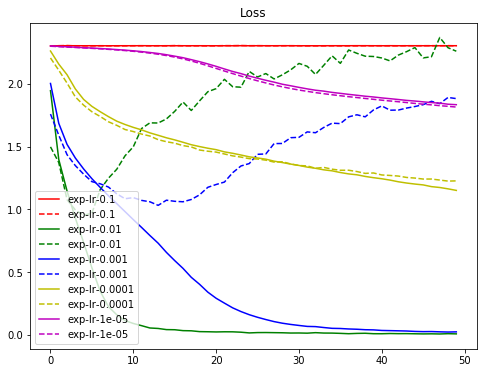

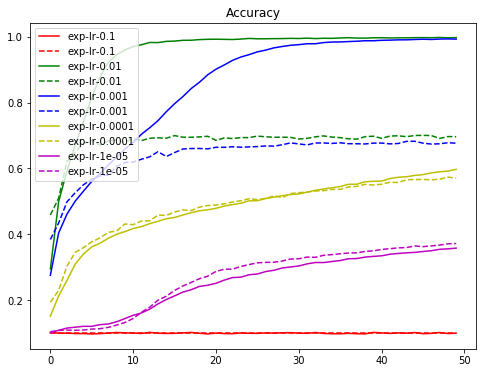

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## 結果討論

以最佳learning rate 0.01(綠色)的結果來看，Momentum越大，train loss下降速度越快，但是有overfitting的問題